# PySpark

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=ba245ed7daef1d8b8715e7642d4269877804ce029e2f385c6bdfb6397cf859ea
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [3]:
sc = spark.sparkContext

# 1 задание

In [84]:
import pandas as pd
columns = ['number','full_name','some_value','state', 'short_name', 'type', 'district', 'area', 'full_address', 'contact_number', 'some_value_2', 'state_2', 'latitude', 'longitude', 'point']
df = pd.read_csv('https://raw.githubusercontent.com/SergUSProject/IntelligentSystemsAndTechnologies/main/HomeWork/spark/data/places.csv', header=None, names=columns)
df.head()

,number,full_name,some_value,state,short_name,type,district,area,full_address,contact_number,some_value_2,state_2,latitude,longitude,point
0,21830,Шоколадница,637379839,да,Шоколадница,кафе,Центральный административный округ,Басманный район,"город Москва, Бауманская улица, дом 33/2, стро...",(495) 916-57-62,48,нет,37.678681,55.773029,"{type=Point, coordinates=[37.6786812768991, 55..."
1,22366,МУ-МУ,637379891,да,Му-Му,кафе,Центральный административный округ,Басманный район,"город Москва, Бауманская улица, дом 35/1",(499) 261-33-58,160,нет,37.678960,55.771587,"{type=Point, coordinates=[37.678960226637, 55...."
2,28608,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,637381676,нет,NaN,буфет,Центральный административный округ,Басманный район,"город Москва, Бригадирский переулок, дом 3-5",(499) 261-51-67,34,нет,37.679609,55.765455,"{type=Point, coordinates=[37.67960922494895, 5..."
3,132486,Дом 12,637393784,нет,NaN,буфет,Центральный административный округ,Басманный район,"город Москва, улица Казакова, дом 8А",(926) 295-05-77,24,нет,37.661498,55.762609,"{type=Point, coordinates=[37.661498425199866, ..."
4,22357,Чито-Ра,637393797,нет,NaN,кафе,Центральный административный округ,Басманный район,"город Москва, улица Казакова, дом 10/2, строен...",(499) 265-78-76,40,нет,37.662846,55.762201,"{type=Point, coordinates=[37.6628455148762, 55..."


In [85]:
df.shape

(769, 15)

In [86]:
y_data = df[['latitude', 'longitude']]

In [87]:
df = spark.createDataFrame(df)
data_rdd = df.rdd 

In [88]:
data_rdd.take(2)

[Row(number=21830, full_name='Шоколадница', some_value=637379839, state='да', short_name='Шоколадница', type='кафе', district='Центральный административный округ', area='Басманный район', full_address='город Москва, Бауманская улица, дом 33/2, строение 1', contact_number='(495) 916-57-62', some_value_2=48, state_2='нет', latitude=37.67868127689911, longitude=55.77302899555391, point='{type=Point, coordinates=[37.6786812768991, 55.7730289955539]}'),
 Row(number=22366, full_name='МУ-МУ', some_value=637379891, state='да', short_name='Му-Му', type='кафе', district='Центральный административный округ', area='Басманный район', full_address='город Москва, Бауманская улица, дом 35/1', contact_number='(499) 261-33-58', some_value_2=160, state_2='нет', latitude=37.678960226637, longitude=55.771586681103294, point='{type=Point, coordinates=[37.678960226637, 55.7715866811033]}')]

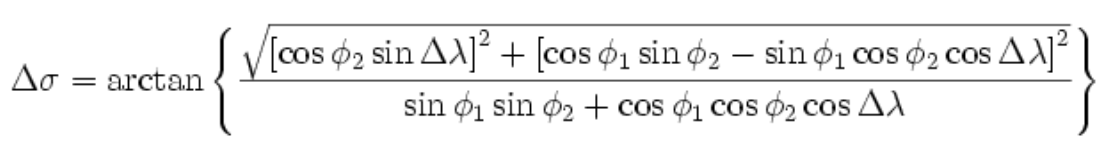

In [89]:
import math
lat2 = 55.751244
lng2 = 37.618423
def Gaversinus(lat1, lng1, lat2, lng2): 
  R = 6371 
  lat = (lat2 - lat1) * (math.pi / 180)
  lng = (lng2 - lng1) * (math.pi / 180)
  rez = math.sin(lat / 2) * math.sin(lat / 2) + math.cos(lat1 * (math.pi / 180)) * math.cos(lat2 * (math.pi / 180)) * math.sin(lng / 2) * math.sin(lng / 2);
  d = 2 * R * math.atan2(math.sqrt(rez), math.sqrt(1-rez));
  return d

data_map_rdd = data_rdd.map(lambda x: Gaversinus(x.latitude, x.longitude, lat2, lng2))
data_map_rdd.take(10)

[2423.9586003529253,
 2423.8713224352405,
 2423.552916816269,
 2425.210220142108,
 2425.0612220743787,
 2425.7289668735857,
 2425.6672860001604,
 2427.844132479675,
 2427.844132479675,
 2427.741802939873]

In [ ]:
def pair_wise(lat1, lng1): 
  dists = []
  for y in y_data.values: 
    dists.append(Gaversinus(lat1, lng1, y[0], y[1]))
  return dists

data_map_rdd = data_rdd.map(lambda x: pair_wise(x.latitude, x.longitude))
data_map_rdd.take(1)

In [ ]:
data_map_rdd = data_map_rdd.zipWithIndex()
data_map_rdd.first()

In [92]:
data_map_rdd_indexes = data_map_rdd.flatMap(lambda x: [(x[1], w, x[0][w]) for w in range(len(x[0]))])
data_map_rdd_indexes.take(20) #индексы кафе и расстояния между ними

[(0, 0, 0.0),
 (0, 1, 0.1306660469815309),
 (0, 2, 0.6745259533162232),
 (0, 3, 2.1193660657239612),
 (0, 4, 2.0022040350529697),
 (0, 5, 2.524038186727086),
 (0, 6, 2.434066442484399),
 (0, 7, 5.016245831835019),
 (0, 8, 5.016245831835019),
 (0, 9, 4.876102310152428),
 (0, 10, 4.880967075911933),
 (0, 11, 4.880967075911933),
 (0, 12, 4.845636716037473),
 (0, 13, 4.446625173772371),
 (0, 14, 4.5290340878199755),
 (0, 15, 4.47617577628091),
 (0, 16, 4.267568168068885),
 (0, 17, 3.5807823770695744),
 (0, 18, 5.217589246543922),
 (0, 19, 0.19273769121451886)]

In [93]:
data_map_rdd_indexes = data_map_rdd_indexes.filter(lambda x: x[0] != x[1]) 
data_map_rdd_indexes.take(20)

[(0, 1, 0.1306660469815309),
 (0, 2, 0.6745259533162232),
 (0, 3, 2.1193660657239612),
 (0, 4, 2.0022040350529697),
 (0, 5, 2.524038186727086),
 (0, 6, 2.434066442484399),
 (0, 7, 5.016245831835019),
 (0, 8, 5.016245831835019),
 (0, 9, 4.876102310152428),
 (0, 10, 4.880967075911933),
 (0, 11, 4.880967075911933),
 (0, 12, 4.845636716037473),
 (0, 13, 4.446625173772371),
 (0, 14, 4.5290340878199755),
 (0, 15, 4.47617577628091),
 (0, 16, 4.267568168068885),
 (0, 17, 3.5807823770695744),
 (0, 18, 5.217589246543922),
 (0, 19, 0.19273769121451886),
 (0, 20, 3.18713064112489)]

In [94]:
data_rdd = data_rdd.zipWithIndex()

In [99]:
data_map_rdd_sorted_ascending = data_map_rdd_indexes.sortBy(lambda x: x[2], ascending=True)
data_map_rdd_sorted_ascending.take(10)

[(7, 8, 0.0),
 (7, 249, 0.0),
 (7, 289, 0.0),
 (8, 7, 0.0),
 (8, 249, 0.0),
 (8, 289, 0.0),
 (10, 11, 0.0),
 (11, 10, 0.0),
 (21, 22, 0.0),
 (22, 21, 0.0)]

In [100]:
data_map_rdd_sorted_descending = data_map_rdd_indexes.sortBy(lambda x: x[2], ascending=False)
data_map_rdd_sorted_descending.take(10)

[(93, 360, 9.267171644327652),
 (93, 361, 9.267171644327652),
 (93, 362, 9.267171644327652),
 (93, 497, 9.267171644327652),
 (360, 93, 9.267171644327652),
 (361, 93, 9.267171644327652),
 (362, 93, 9.267171644327652),
 (497, 93, 9.267171644327652),
 (93, 105, 9.084024636560684),
 (105, 93, 9.084024636560684)]

In [102]:
print('Топ 10 самых ближних кафе: ')
count = 1
for d in data_map_rdd_sorted_descending.take(10): 
  name1 = data_rdd.filter(lambda x: x[1] == d[0]).first()[0][1]
  name2 = data_rdd.filter(lambda x: x[1] == d[1]).first()[0][1]
  print(count, '--->', name1, 'и', name2)
  count += 1
print('Топ 10 самых далеких кафе: ')
count = 1
for d in data_map_rdd_sorted_ascending.take(10): 
  name1 = data_rdd.filter(lambda x: x[1] == d[0]).first()[0][1]
  name2 = data_rdd.filter(lambda x: x[1] == d[1]).first()[0][1]
  print(count, '--->', name1, 'и', name2)
  count += 1

Топ 10 самых ближних кафе: 
1 ---> МНИТИ и Calabash Club
2 ---> МНИТИ и Залечь на дно
3 ---> МНИТИ и Политех
4 ---> МНИТИ и Антикафе Checkpoint
5 ---> Calabash Club и МНИТИ
6 ---> Залечь на дно и МНИТИ
7 ---> Политех и МНИТИ
8 ---> Антикафе Checkpoint и МНИТИ
9 ---> МНИТИ и Шоколадница
10 ---> Шоколадница и МНИТИ
Топ 10 самых далеких кафе: 
1 ---> Beer Gik и Погребок
2 ---> Beer Gik и Kozlovna
3 ---> Beer Gik и Па-Паэлья
4 ---> Погребок и Beer Gik
5 ---> Погребок и Kozlovna
6 ---> Погребок и Па-Паэлья
7 ---> TEMPO DI PASTA и Хлеб насущный
8 ---> Хлеб насущный и TEMPO DI PASTA
9 ---> Глав Пив Маг и Beermood
10 ---> Beermood и Глав Пив Маг


# 2 задание

In [ ]:
!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Software_5.json.gz

--2023-05-27 12:21:51--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Software_5.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 5339013 (5.1M) [application/x-gzip]
Saving to: ‘Software_5.json.gz’

Software_5.json.gz  100%[===================>]   5.09M  21.9MB/s    in 0.2s    

2023-05-27 12:21:51 (21.9 MB/s) - ‘Software_5.json.gz’ saved [5339013/5339013]

tar (child): /Software_5.json.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Software_5.json.gz')
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,False,"10 20, 2010",A38NELQT98S4H8,0321719816,{'Format:': ' DVD-ROM'},WB Halper,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,1287532800,NaN,NaN
1,4.0,False,"10 18, 2010",A3QJU4FEN8PQSZ,0321719816,{'Format:': ' DVD-ROM'},Grimmy,"The demo is done with the PC version, with ref...",A good value,1287360000,NaN,NaN
2,5.0,False,"10 16, 2010",ACJT8MUC0LRF0,0321719816,{'Format:': ' DVD-ROM'},D. Fowler,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,1287187200,3,NaN
3,5.0,False,"10 12, 2010",AYUF7YETYOLNX,0321719816,{'Format:': ' DVD-ROM'},Bryan Newman,I've been creating websites with Dreamweaver f...,A Fantastic Overview of Dream Weaver and Web D...,1286841600,NaN,NaN
4,5.0,False,"10 7, 2010",A31ICLWQ9CSHRS,0321719816,{'Format:': ' DVD-ROM'},Al Swanson,I decided (after trying a number of other prod...,Excellent Tutorials!,1286409600,NaN,NaN


In [ ]:
df = df[['overall', 'asin', 'reviewerName', 'reviewText', 'summary']]
df.head()

,overall,asin,reviewerName,reviewText,summary
0,4.0,0321719816,WB Halper,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5
1,4.0,0321719816,Grimmy,"The demo is done with the PC version, with ref...",A good value
2,5.0,0321719816,D. Fowler,If you've been wanting to learn how to create ...,This is excellent software for those who want ...
3,5.0,0321719816,Bryan Newman,I've been creating websites with Dreamweaver f...,A Fantastic Overview of Dream Weaver and Web D...
4,5.0,0321719816,Al Swanson,I decided (after trying a number of other prod...,Excellent Tutorials!


In [ ]:
print("Before dropna:", df.shape)
df = df.dropna()
print("After dropna:", df.shape)

Before dropna: (12805, 5)
After dropna: (12789, 5)


In [ ]:
spark_df = spark.createDataFrame(df)
print(spark_df.printSchema())
print(spark_df.show(truncate=False))
data_rdd = spark_df.rdd 
print(data_rdd.first())

root
 |-- overall: double (nullable = true)
 |-- asin: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- summary: string (nullable = true)

None
+-------+----------+------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from operator import add
def to_list(a):
    return [a]

def append(a, b):
    a.append(b)
    return a

def extend(a, b):
    a.extend(b)
    return a

avg_values = data_rdd.map(lambda x: (x.asin, x.overall)).combineByKey(to_list, append, extend).map(lambda x: (x[0], sum(x[1])/len(x[1])))
avg_values.take(10) #средние оценки для каждого товара

[('0321719816', 4.571428571428571),
 ('0321719824', 4.222222222222222),
 ('0763855553', 4.027777777777778),
 ('1413313728', 4.2105263157894735),
 ('1615354336', 4.6),
 ('B00003IRBU', 3.4285714285714284),
 ('B00003IRBV', 4.125),
 ('B00003JAU7', 4.0),
 ('B000050ZRE', 4.930131004366812),
 ('B00005AFI2', 3.6)]

In [ ]:
avg_values_less_3 = avg_values.filter(lambda x: x[1] < 3)
avg_values_less_3.take(10) #выбираем товары с оценкой ниже 3

[('B00005AFI4', 2.75),
 ('B00006FI0Z', 2.3333333333333335),
 ('B00006ULHT', 2.6666666666666665),
 ('B0000C8Y0W', 2.6),
 ('B00022PTRU', 2.857142857142857),
 ('B0002UCSKI', 2.4545454545454546),
 ('B00062VOW0', 2.5714285714285716),
 ('B000B5NS2G', 2.1538461538461537),
 ('B000GUDDXA', 2.1666666666666665),
 ('B000HCTYTO', 1.8461538461538463)]

In [ ]:
avg_values_less_3.takeOrdered(num = 10, key = lambda x: x[1]) #топ-10 товаров с наименьшим рейтингом.

[('B000VQ7HO0', 1.0),
 ('B000VQ8AM8', 1.0),
 ('B000WS1590', 1.0),
 ('B0012RAVRC', 1.0),
 ('B00004W63J', 1.0),
 ('B000VSDNMI', 1.0),
 ('B0013WO6QS', 1.0),
 ('B0014GBX64', 1.0),
 ('B001676QOU', 1.0),
 ('B0014A0UDC', 1.0)]

In [ ]:
new_df = avg_values_less_3.toDF(["asin", "overall"])
print(new_df.printSchema())
print(new_df.show(truncate=False))

root
 |-- asin: string (nullable = true)
 |-- overall: double (nullable = true)

None
+----------+------------------+
|asin      |overall           |
+----------+------------------+
|B00005AFI4|2.75              |
|B00006FI0Z|2.3333333333333335|
|B00006ULHT|2.6666666666666665|
|B0000C8Y0W|2.6               |
|B00022PTRU|2.857142857142857 |
|B0002UCSKI|2.4545454545454546|
|B00062VOW0|2.5714285714285716|
|B000B5NS2G|2.1538461538461537|
|B000GUDDXA|2.1666666666666665|
|B000HCTYTO|1.8461538461538463|
|B000HCTY1W|2.5               |
|B000HCVR30|2.25              |
|B000HCZ9AW|2.2666666666666666|
|B000HCZ9BG|2.1538461538461537|
|B000HCXKKS|2.6666666666666665|
|B000HCTYTE|2.466666666666667 |
|B000LP6JKY|2.8               |
|B000T9LUBU|2.230769230769231 |
|B000VQ7HO0|1.0               |
|B000VQ8AM8|1.0               |
+----------+------------------+
only showing top 20 rows

None


# 3 задание

In [4]:
!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Movies_and_TV_5.json.gz

--2023-06-01 01:33:02--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Movies_and_TV_5.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 791322468 (755M) [application/x-gzip]
Saving to: ‘Movies_and_TV_5.json.gz’

Movies_and_TV_5.jso 100%[===================>] 754.66M  54.4MB/s    in 8.4s    

2023-06-01 01:33:11 (89.6 MB/s) - ‘Movies_and_TV_5.json.gz’ saved [791322468/791322468]



In [5]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
    if i == 250000: #java.lang.OutOfMemoryError: Java heap space, так что уменьшаем количество данных
      break
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Movies_and_TV_5.json.gz')
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,11,NaN
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,5,NaN
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,5,NaN


In [6]:
df = df[['overall', 'asin', 'reviewerName', 'reviewText', 'summary']]
df.head()

,overall,asin,reviewerName,reviewText,summary
0,5.0,0005089549,Terri,So sorry I didn't purchase this years ago when...,Amazing!
1,5.0,0005089549,Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!
2,5.0,000503860X,Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band
3,5.0,000503860X,JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!
4,5.0,000503860X,T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it


In [7]:
print("Before dropna:", df.shape)
df = df.dropna()
print("After dropna:", df.shape)

Before dropna: (250000, 5)
After dropna: (249874, 5)


In [8]:
spark_df = spark.createDataFrame(df)
print(spark_df.printSchema())
print(spark_df.show(truncate=False))
data_rdd = spark_df.rdd 
print(data_rdd.first())

root
 |-- overall: double (nullable = true)
 |-- asin: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- summary: string (nullable = true)

None
+-------+----------+----------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
def to_list(a):
    return [a]

def append(a, b):
    a.append(b)
    return a

def extend(a, b):
    a.extend(b)
    return a

movie_overalls = data_rdd.map(lambda x: (x.asin, x.overall)).combineByKey(to_list, append, extend)
movie_overalls.first()

('0005419263', [5.0, 3.0, 5.0])

In [10]:
y_data = movie_overalls.map(lambda x: x[1]).collect()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def cos_sims(overall): 
  sims = []
  for y in y_data: 
    if len(y) == len(overall):
      y = np.array(y)
      overall = np.array(overall)
      sims.append(cosine_similarity(y.reshape(1, -1), overall.reshape(1, -1)))
    else: 
      sims.append(0)
  return sims

cos_sim_rdd = movie_overalls.map(lambda x: (x[0], cos_sims(x[1])))
cos_sim_rdd.take(1) #косинусное расстояние с каждым из векторов оценок фильмов для 1 фильма

In [ ]:
cos_sim_rdd.collect()[589] #косинусное расстояние с каждым из векторов оценок фильмов для 589 фильма

In [13]:
!wget --no-check-certificate https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Movies_and_TV.json.gz
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('meta_Movies_and_TV.json.gz')
df.head()

--2023-06-01 01:35:09--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Movies_and_TV.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104749005 (100M) [application/x-gzip]
Saving to: ‘meta_Movies_and_TV.json.gz’

meta_Movies_and_TV. 100%[===================>]  99.90M   109MB/s    in 0.9s    

2023-06-01 01:35:10 (109 MB/s) - ‘meta_Movies_and_TV.json.gz’ saved [104749005/104749005]



,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Movies & TV, Movies]",,[],,Understanding Seizures and Epilepsy,[],,,[],"886,503 in Movies & TV (",[],Movies & TV,,,,0000695009,[],[],NaN
1,"[Movies & TV, Movies]",,[],,Spirit Led&mdash;Moving By Grace In The Holy S...,[],,,[],"342,688 in Movies & TV (",[],Movies & TV,,,,0000791156,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Movies & TV, Movies]",,[Disc 1: Flour Power (Scones; Shortcakes; Sout...,,My Fair Pastry (Good Eats Vol. 9),[],,Alton Brown,[],"370,026 in Movies & TV (",[],Movies & TV,,,,0000143529,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,"[Movies & TV, Movies]",,[Barefoot Contessa Volume 2: On these three di...,,"Barefoot Contessa (with Ina Garten), Entertain...","[B002I5GNW4, B005WXPVMM, B009UY3W8O, B00N27ID1...",,Ina Garten,[],"342,914 in Movies & TV (","[B002I5GNW4, 0804187045, B009UY3W8O, 060960219...",Movies & TV,,,$74.95,0000143588,[],[],NaN
4,"[Movies & TV, Movies]",,[Rise and Swine (Good Eats Vol. 7) includes bo...,,Rise and Swine (Good Eats Vol. 7),"[B000P1CKES, B000NR4CRM]",,Alton Brown,[],"351,684 in Movies & TV (",[B0015SVNXY],Movies & TV,,,,0000143502,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [14]:
df_titles = df[['title', 'asin']]
df_titles.head()

,title,asin
0,Understanding Seizures and Epilepsy,0000695009
1,Spirit Led&mdash;Moving By Grace In The Holy S...,0000791156
2,My Fair Pastry (Good Eats Vol. 9),0000143529
3,"Barefoot Contessa (with Ina Garten), Entertain...",0000143588
4,Rise and Swine (Good Eats Vol. 7),0000143502


In [15]:
sp_df_titles = spark.createDataFrame(df_titles)
print(sp_df_titles.printSchema())
print(sp_df_titles.show(truncate=False))
titles_rdd = sp_df_titles.rdd 
print(titles_rdd.first())

root
 |-- title: string (nullable = true)
 |-- asin: string (nullable = true)

None
+---------------------------------------------------------------------------------------------------------------------------------+----------+
|title                                                                                                                            |asin      |
+---------------------------------------------------------------------------------------------------------------------------------+----------+
|Understanding Seizures and Epilepsy                                                                                              |0000695009|
|Spirit Led&mdash;Moving By Grace In The Holy Spirit's Gifts                                                                      |0000791156|
|My Fair Pastry (Good Eats Vol. 9)                                                                                                |0000143529|
|Barefoot Contessa (with Ina Garten), Entertaining With In

In [16]:
titles_rdd = titles_rdd.map(lambda x: (x[1], x[0]))
titles_rdd.first()

('0000695009', 'Understanding Seizures and Epilepsy')

In [ ]:
cos_sim_rdd_with_titles = cos_sim_rdd.join(titles_rdd) 
cos_sim_rdd_with_titles.first() #соединяем названия с asin

In [ ]:
cos_sim = cos_sim_rdd_with_titles.zipWithIndex()
cos_sim.first()

In [43]:
cos_sim_indexes = cos_sim.flatMap(lambda x: [(x[1], w, x[0][1][0][w]) for w in range(len(x[0][1][0]))])
cos_sim_indexes.take(20) #косинусное сходство для каждого вектора оценок по индексам

[(0, 0, array([[1.]])),
 (0, 1, 0),
 (0, 2, 0),
 (0, 3, 0),
 (0, 4, 0),
 (0, 5, 0),
 (0, 6, 0),
 (0, 7, 0),
 (0, 8, 0),
 (0, 9, 0),
 (0, 10, 0),
 (0, 11, 0),
 (0, 12, 0),
 (0, 13, 0),
 (0, 14, 0),
 (0, 15, 0),
 (0, 16, array([[0.97713984]])),
 (0, 17, 0),
 (0, 18, 0),
 (0, 19, 0)]

In [44]:
cos_sim_indexes_sorted = cos_sim_indexes.sortBy(lambda x: x[2], ascending=False)
cos_sim_indexes_sorted.take(20)

[(1670, 133, array([[1.]])),
 (897, 1761, array([[1.]])),
 (110, 212, array([[1.]])),
 (851, 1674, array([[1.]])),
 (947, 1862, array([[1.]])),
 (1071, 2088, array([[1.]])),
 (1377, 2694, array([[1.]])),
 (1632, 61, array([[1.]])),
 (2206, 1212, array([[1.]])),
 (2476, 1778, array([[1.]])),
 (2486, 1798, array([[1.]])),
 (40, 72, array([[1.]])),
 (87, 161, array([[1.]])),
 (271, 520, array([[1.]])),
 (320, 622, array([[1.]])),
 (321, 623, array([[1.]])),
 (667, 1307, array([[1.]])),
 (1109, 2150, array([[1.]])),
 (1131, 2196, array([[1.]])),
 (1425, 2798, array([[1.]]))]

In [54]:
top_10 = cos_sim_indexes_sorted.take(10)
count = 0
print("Топ 10 наиболее похожих фильмов: ")
for y in top_10: 
  title1 = cos_sim.filter(lambda x: x[1] == y[0]).collect()[0][0][1][1]
  title2 = cos_sim.filter(lambda x: x[1] == y[1]).collect()[0][0][1][1]
  print(count, "--->", title1, "и", title2)
  count += 1

Топ 10 наиболее похожих фильмов: 
0 ---> Blade Runner и Carnival of Souls
1 ---> In Harm's Way VHS и Meet Wally Sparks
2 ---> Sense &amp; Sensibility и Trouble in Mind VHS
3 ---> My Left Foot и Dracula a.D. 1972 VHS
4 ---> Dances with Wolves (VHS 8768) и Naked Prey VHS
5 ---> Airplane VHS и Father of the Bride VHS
6 ---> The Day the Earth Stood Still VHS и The Spy Who Came in From the Cold VHS
7 ---> Suspicion VHS и Lilo &amp; Stitch 2: Stitch Has a Glitch
8 ---> The Quiet Man VHS и Days of Glory VHS
9 ---> Fiddler on the Roof и Muay Thai: Knockout One VHS
